In [8]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [9]:
# Loading your IBM Quantum account(s)
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-04-30 00:55:36,251: Credentials are already in use. The existing account in the session will be replaced.


# Submitting Jobs to Simulator

Write a Quantum Program to create the following Bell State $$\frac{1}{\sqrt{2}}\left(\vert00\rangle + \vert11\rangle\right)$$ 

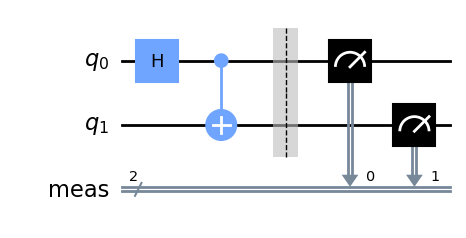

In [10]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.measure_all()
mycircuit.draw('mpl')

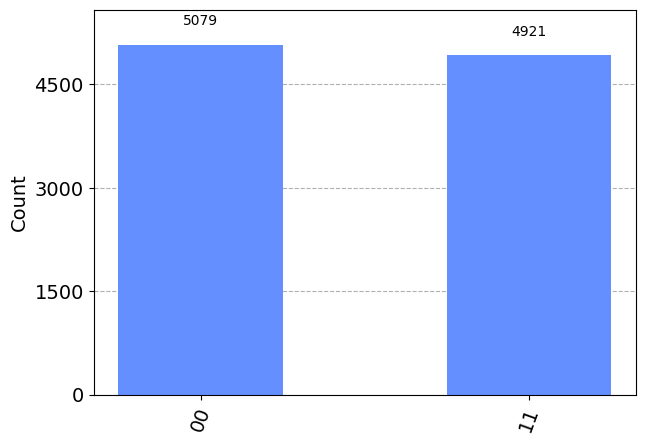

In [11]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, simulator, shots=10000).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)

# Submitting Jobs to Real Device

In [12]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [14]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
from qiskit.tools.monitor import job_monitor

In [ ]:
backend = provider.get_backend('ibmq_belem')

In [16]:
mycircuit = QuantumCircuit(2,2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.measure([0,0],[1,1])

In [20]:
mycircuit_trans = transpile(mycircuit, backend)
job = backend.run(mycircuit_trans, shots=8192)
print(job.job_id())
job_monitor(job)
    
output = job.result().get_counts()

ch6rs2p6klhd7q955sbg
Job Status: job has successfully run


In [ ]:
import qiskit
qiskit.__qiskit_version__